# Ejercicios

1. How would you describe TensorFlow in a short sentence? What are its main features? Can you name other popular deep learning libraries?

    - Tensor Flow es una libreria de calculos optimizados, implementa operaciones matemáticas con un método propio de alta eficiencia utilizando grafos de operaciones. Para ello implementa diversas estructuras de datos y funciones que puede interpretar y optimizar. También actua con distintos kernels que implementan operaciones de forma optima según el hardware en que se esté ejecutando. Por ejemplo, existe un kernel para Apple m2 pro, otro para GPU gtx 3090, parte de su funcionalidad de optimización es aprovechar las GPUs, que permiten procesar en paralelo generando más eficiencia. También da implementaciones orientadas a Machine Learning como en su api keras, donde tiene modelos, capas, optimizadores, metricas, callbacks, integración con una UI para mejor interpretación de resultados, esto permite reutilizar componentes y acelerar el proceso de desarrollo y el mantenimiento de sistemas. Las otras librerías pueden ser PyTorch, Scikit Learn, NumPy.

    Respuesta libro
    - TensorFlow is an open-source library for numerical computation, particularly well suited and fine-tuned for large-scale Machine Learning. Its core is similar to NumPy, but it also features GPU support, support for distributed computing, computation graph analysis and optimization capabilities (with a portable graph format that allows you to train a TensorFlow model in one environment and run it in another), an optimization API based on reverse-mode autodiff, and several powerful APIs such as tf.keras, tf.data, tf.image, tf.signal, and more. Other popular Deep Learning libraries include PyTorch, MXNet, Microsoft Cognitive Toolkit, Theano, Caffe2, and Chainer.

2. Is TensorFlow a drop-in replacement for NumPy? What are the main differences between the two?

    - TensorFlow muchas operaciones similares a como lo hace Numpy, pero no son un match exacto en cuanto a su contrato, tf.reduce_sum() es distinto al np.sum(). Transpose por ejemplo devuelve una copia de una matriz transpuesta en tensor, pero en num una vista transpuesta de la matriz. Los arrays de NumPy son mutables, pero en tensor los tensores no, se tiene que usar .variable. NumPy no aprovecha la GPU como lo hace Tensor, que ese mucho más complejo.

3. Do you get the same result with tf.range(10) and tf.constant(np.ara⁠nge(10))?

    - Ambos devuelven un array con los 10 primeros enteros, pero el de tensorFlow es de 32 bits y el numpy de 64. 

4. Can you name six other data structures available in TensorFlow, beyond regular tensors?
    - Sparse tensors: tf.SparseTensor, representa de forma eficiente tensores con gran propocion de valores en 0
    - Tensor arrays: tf.TensorArray, Es una lista de tensores de largo fijo en un inicio, pero opcionalmente se los puede hacer extensibles. Todos los tensores deben tener el mismo shape y tipo de dato
    - Ragged tensor (tensor irregular): Representa una lista de tensores, todos de un mismo tipo y rank pero con shape variable. Las dimensiones sobre las cuales varia el tamaño del tensor se llaman dimensiones irregulares. El tf.raggedTensor tiene las operaciones para usar con estos tensores.
    - String tensors: Son tensores regulares de tipo tf.string. Representan strings en byte, no en unicode. Si se crea con un string de python unicode se pasa a utf-8 automáticamente. Se puede representar tensores unicode utilizando int32, donde cada número representa un tensor. tf.strings tiene operaciones para convertir de unicode a utf-8 y viceversa. tf.string, es atómico, su largo no aparece en el shape del tensor. Una vez que se convierte a un Unicode tensor, el largo aparece en el shape.
    - Sets: Se representan con tensores regulares o Sparse. Más generalmente, cada conjunto se representa como un vector en el último eje del tensor. tf.sets tiene las operaciones necesarias.
    - queues: Guarda tensores en cada paso. Fifo, Priority, Random, PaddingFifo (toma cosas de varios shapes)

5. You can define a custom loss function by writing a function or by subclassing the tf.keras.losses.Loss class. When would you use each option?
    
    Usás una clase cuando necesitás una función custom que guarde algún hiperparámetro junto con el modelo o que necesite algún otro hiperparámetro custom. Se debe implementar el método __init__() y el call(). Si se quiere guardar otro parámetro se debe implementar el get_config().

6. Similarly, you can define a custom metric in a function or as a subclass of tf.keras.metrics.Metric. When would you use each option?

    tilizar una función es para cuando tu métrica se acumula con el promedio entre los distintos batches que componen una época. Cuando se extiende la clase tf.keras.losses.Loss se puede utilizar otra forma de acumular, como es el caso de la métrica de precisión en clasificación binaria, donde no se promedia de un batch al otro, sino que es necesario contar la cantidad de predicciónes de una clase acertadas y eliminadas. E ir sumándolas para calcular la métrica. Los métodos a implementar son __init()__, update_state() y result(), también restart_state() si no se quiere que se pongan en 0 todas la variables automáticamente. get_config() hace que se guarde con el modelo los valores de la clase.

7. When should you create a custom layer versus a custom model?

    Cuando usar una capa custom

        Si se requiere una implementación muy repetitiva, se puede utilizar para tomar algun conjunto de muchas capas como una sola capa. Se puede utilizar como una capa función de activación. Para crear una capa con múltiples inputs u outputs. Si se quiere configurar comportamientos distintos entre entrenamiento y ejecución. 

    Cuando usar un modelo en concreto

        Por la arquitectura del modelo, cuando se quiere manipular el flujo de los pesos, por ejemplo sumar a los pesos de la activación, los de entrada. El modelo tiene funcionalidades extra, el *compile(), fit(), evaluate() y predict(). get_layer() y save methods() y load_model() y clone_model()*.
        
    También por supuesto, es una división semántica de los componentes de un modelo.

8. What are some use cases that require writing your own custom training loop?
    A veces customizar el método *fit()* puede no ser suficiente. Por ejemplo para el caso de un DNN wide & deep, donde se usa dos optimizadores distintos en una misma neural network, el método fit permite usar 1. Se puede utilizar por obtener seguridad sobre lo que hace el loop de entrenamiento y evitar depender de detalles de la implementación de Keras, pero eso genera más código propenso a errores y para mantener.
    Las métricas diferentes a lo largo de cada lote puede ser una opción para customizar este loop.

    Para la mayoría de las cosas hay callbacks, custom regularizers, custom constraints, custom losses y demás, hay que usarlos en lugar del custom loop.

9. Can custom Keras components contain arbitrary Python code, or must they be convertible to TF functions?
    I should not content arbitrary python code. Using tf operations, data types make keras understand and optimize functions.

    Custom Keras components should be convertible to TF Functions, which means they should stick to TF operations as much as possible and respect all the rules listed in Chapter 12 (in the TF Function Rules section). If you absolutely need to include arbitrary Python code in a custom component, you can either wrap it in a *tf.py_function()* operation (but this will reduce performance and limit your model's portability) or set dynamic=True when creating the custom layer or model (or set *run_eagerly=True* when calling the model's *compile()* method).

10. What are the main rules to respect if you want a function to be convertible to a TF function?

Para convertir una función de python a una que ejecuta operaciones de TensorFlow a una función TensorFlow es trivial hay que decorarla con @tf.function o dejar que keras lo haga, pero para ello hay que respetar ciertas reglas:

    1. Si se llama a una librería externa, ese llamado se ejecutara solo durante la trazabilidad de la función, por lo que no va a ser parte del grafo

    2. TensorFlow solo puede incluir en el grafo constructores de TensorFlow (tensores, operaciones, variables, datasets y más)

    3. Hay que usar *tf.reduce_sum()*, *tf.sort()* en lugar de sus respectivas implementaciones de NumPy o python nativo. Esto tiene algunas implicaciones más

    4. Si definís una función f(x) que retorna np.random.rand(), un númeor random solo se va a generar cuando la función es trazabilizada. Entonces f(tf.constant(2.)) y f(tf.constant(3.)) van a retornar el mismo número, pero si varía el shape se retorna otro diferente. Si se cambia np.random.rand() por *tf.random.uniform([])* entonces se genera un número randómico con cada llamado, porque la operación pasa a ser parte del grafo.

    5. Si tu código no Tensor-Flow tiene efectos secundarios como un llamado a una api o un logueo de algo o actualizar una variable global entonces no se puede esperar que eso ocurra cada vez que tensor flow llama a la función, ya que solo van a suceder cuando la función trazabilizada.

    6. Se puede wrapear código arbitrario de Python en una *tf.py_function()*, pero hacerlo va a mermar la performance. También reduce la portabilidad, ya que el grafo solo corre en plataformas donde Python está disponible.

    7. Si la función crea una variable TensorFlow, debe hacerlo en la primer llamada, y solo ahí, o sino se va a levantar una excepción. Es usualmente preferible crear las variables fuera de la función TensorFlow (en el método build por ejemplo de una custom layer). Si se quiere asignar un valor a la variable, hay que asegurarse de llamar al método *assign()* en lugar de *=* 

    8. El source code tiene que estar disponible para tensor flow, si lo declaras en el shell de python por ejemplo y luego no se puede llamar a la función va a ocurrir un error.

    9. TensorFlow va a capturar un for que itere solo sobre un tensor o un tf.data.Dataset. Entonces hay que usar *tf.range(x)* en lugar de *for i in range(x)* o sino el grafo no captura el loop y ese código que se corre cuando se compila el modelo.

    10. Siempre se pueden utilizar, por razones de performance, implementaciones vectorizadas siempre que se pueda, en lugar de utilizar loops.

11. When would you need to create a dynamic Keras model? How do you do that? Why not make all your models dynamic?
    
    - Este modo cancela todas las operaciones de optimización de TensorFlow, es lo que se hace cuando se quiere debuguear el modelo, o poner código python cualquier para ejecutar usar o entrenar el modelo. Se puede usar con el flag *Dynamic=true* al crear el modelo o *run_eagerly=true* al llamar al método *compile()*. Hacer esto hace más lento al modelo y anula cualquier posibilidad de portabilidad via TensorFlow





- Implement a custom layer that performs layer normalization

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
tf.random.set_seed(42)

class NormalizationLayer(tf.keras.layers.Layer):
    def __init__(self, epsilon=0.001, **kwargs):
        super().__init__(**kwargs)
        self.epsilon = epsilon


    def build(self, batch_input_shape): # Crea las variables de la capa, se llama la primera vez que se usa.
        # Keras infiere el batch_input_shape solo si la capa no es Dynamic=true, en este caso hay que implementar compute_output_shape() 
        # que retorna un objecto TensorShape
        self.alpha = self.add_weight(
            name="alpha", shape=batch_input_shape[-1:], dtype=tf.float32,
            initializer=tf.keras.initializers.Ones())

        self.gamma = self.add_weight(
            name="gamma", shape=batch_input_shape[-1:], dtype=tf.float32,
            initializer="zeros")
        
        super().build(batch_input_shape) #Tell keras the model is built

    def call(self, X):
        x_mean, x_variance = tf.nn.moments(X, axes=-1, keepdims=True)
        x_std = tf.sqrt(x_variance + self.epsilon) #Note that making ε a hyperparameter (eps) was not compulsory. Also note that it's 
        # preferable to compute tf.sqrt(variance + self.eps) rather than tf.sqrt(variance) + self.eps. Indeed, 
        # the derivative of sqrt(z) is undefined when z=0, so training will bomb whenever the variance vector has at least one component 
        # equal to 0. Adding ε within the square root guarantees that this will never happen.
        result = self.alpha * (X - x_mean) / (x_std) + self.gamma
        return result

    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "eps": self.epsilon}

In [2]:
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full.astype(np.float32) / 255.
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
X = X_train.astype(np.float32)

custom_layer_norm = NormalizationLayer()
keras_layer_norm = tf.keras.layers.LayerNormalization()

tf.reduce_mean(tf.keras.losses.MeanAbsoluteError()(
    keras_layer_norm(X), custom_layer_norm(X)))

<tf.Tensor: shape=(), dtype=float32, numpy=6.864475e-08>

In [3]:
tf.keras.utils.set_random_seed(42)
random_alpha = np.random.rand(X.shape[-1])
random_beta = np.random.rand(X.shape[-1])

custom_layer_norm.set_weights([random_alpha, random_beta])
keras_layer_norm.set_weights([random_alpha, random_beta])

tf.reduce_mean(tf.keras.losses.MeanAbsoluteError()(
    keras_layer_norm(X), custom_layer_norm(X)))

<tf.Tensor: shape=(), dtype=float32, numpy=3.2476922e-08>

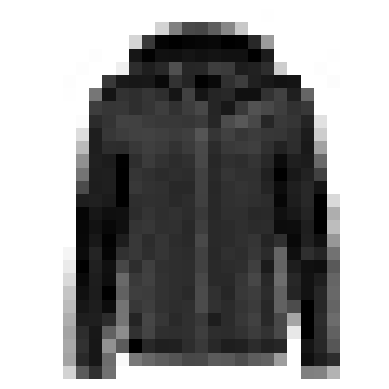

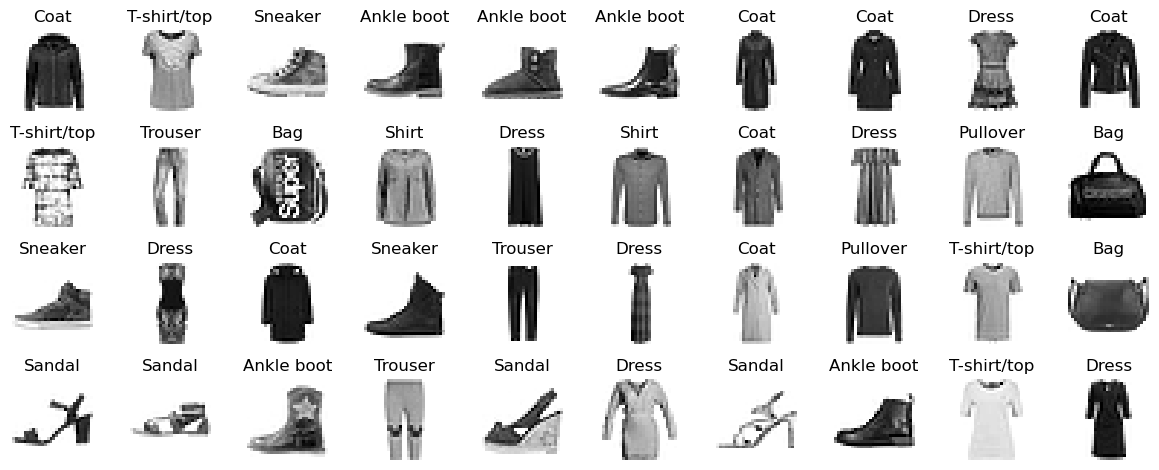

In [4]:
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full.astype(np.float32) / 255.
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test.astype(np.float32) / 255.

plt.imshow(X_train[0], cmap="binary")
plt.axis("off")
plt.show()

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

images_path = Path() / "mnist" / "run"
images_path.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = images_path / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)

save_fig("fashion_mnist_plot")
plt.show()

In [5]:
def random_batch(X, y, batch_size=32):
    idx = np.random.randint(len(X), size=batch_size)
    return X[idx], y[idx]

In [ ]:
from tqdm import trange
from collections import OrderedDict

def print_status_bar(step, total, loss, metrics=None):
    metrics = "-".join([f"{m.name}: {m.result():.4f}"
        for m in [loss] + (metrics or [])])
    end = "" if step < total else "\n"
    print(f"\r{step}/{total} - " + metrics, end=end)

n_epochs = 5
batch_size = 32
n_steps = len(X_train) // batch_size
optimizer = tf.keras.optimizers.legacy.Nadam(learning_rate=0.01)
loss_fn = tf.keras.losses.sparse_categorical_crossentropy
mean_loss = tf.keras.metrics.Mean()
metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

with trange(1, n_epochs + 1, desc="All epochs") as epochs:
    for epoch in epochs:
        for step in steps:
            X_batch, y_batch = random_batch(X_train, y_train)
            with tf.GradientTape() as tape:
                y_pred = model(X_batch)
                main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred))
                loss = tf.add_n([main_loss] + model.losses)
            gradients = tape.gradient(loss, model.trainable_variables)
            optimizer.apply_gradients(zip(gradients, model.trainable_variables))
            for variable in model.variables:
                if variable.constraint is not None:
                    variable.assign(variable.constraint(variable))                    
            status = OrderedDict()
            mean_loss(loss)
            status["loss"] = mean_loss.result().numpy()
            for metric in metrics:
                metric(y_batch, y_pred)
                status[metric.name] = metric.result().numpy()
            steps.set_postfix(status)
        y_pred = model(X_valid)
        status["val_loss"] = np.mean(loss_fn(y_valid, y_pred))
        status["val_accuracy"] = np.mean(tf.keras.metrics.sparse_categorical_accuracy(
            tf.constant(y_valid, dtype=np.float32), y_pred))
        steps.set_postfix(status)
        for metric in [mean_loss] + metrics:
            metric.reset_state()

In [38]:
lower_layers = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(100, activation="relu"),
])

upper_layers = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="softmax")
])

model = tf.keras.Sequential([
    lower_layers, upper_layers
])

In [39]:
lower_optimizer = tf.keras.optimizers.legacy.SGD(learning_rate=0.0001)
upper_optimizer = tf.keras.optimizers.legacy.Nadam(learning_rate=0.001)

n_epochs = 5
batch_size = 32
n_steps = len(X_train) // batch_size
loss_fn = tf.keras.losses.sparse_categorical_crossentropy
mean_loss = tf.keras.metrics.Mean()
metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]

In [ ]:
with trange(1, n_epochs + 1, desc="All epochs") as epochs:
    for epoch in epochs:
        for step in steps:
            X_batch, y_batch = random_batch(X_train, y_train)
            with tf.GradientTape() as tape:
                y_pred = model(X_batch)
                main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred))
                loss = tf.add_n([main_loss], model.losses)
            for layers, optimizer in ((lower_layers, lower_optimizer),
                                      (upper_layers, upper_optimizer)):
                gradients = tape.gradient(loss, layers.trainable_variables)
                optimizer.apply_gradients(zip(gradients, layers.trainable_variables))
            del tape
            for variable in model.variables:
                if variable.constraint is not None:
                    variable.assign(variable.constraint(variable))                    
            status = OrderedDict()
            mean_loss(loss)
            status["loss"] = mean_loss.result().numpy()
            for metric in metrics:
                metric(y_batch, y_pred)
                status[metric.name] = metric.result().numpy()
            steps.set_postfix(status)
        y_pred = model(X_valid)
        status["val_loss"] = np.mean(loss_fn(y_valid, y_pred))
        status["val_accuracy"] = np.mean(tf.keras.metrics.sparse_categorical_accuracy(
            tf.constant(y_valid, dtype=np.float32), y_pred))
        steps.set_postfix(status)
        for metric in [mean_loss] + metrics:
            metric.reset_state()